<a href="https://colab.research.google.com/github/NihalSidhu/Value-Over-Replacement-FF-Strategy/blob/main/UsingDataInFantasyFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Data to Develop a Fantasy Football Draft Strategy

Since I was a little kid I have been addicted to the NFL and more specifically, fantasy football. I have loved every aspect of fantasy football, whether it be drafting, adding, trading or starting players. While playing, I always looked for opportunities where I could get a leg up on my league mates. Luckily, that is where my studying paid off.

In college I majored in Data Science and got to learn about different techniques that I can use to leverage data to gain insights. Today I will be showcasing how we can leverage programming in data science to create a fantasy football draft strategy. If you enjoy football and coding, you have come to the right place!


# Table of Contents
- Quick Summary of Fantasy Football
- What is Value Over Replacement (VOR)?
- The Big Question
- Data Collection
- Data Processing
- Data Collection and Processing Part 2
- Data Modeling
- Model Deployment
- Model Analysis
- Insights
- Conclusion

## Quick Summary of Fantasy Football

Fantasy football is a game involving users (the owners) creating their own teams of players from real life players in the National Football League (NFL). Users will participate together in a league where each week users will face off against one another to see who's fantasy team scored more points based on the performance of the players in NFL games. At the end of the season, the user in the league who has won the most games will be crowned the champion!

Here is an example for those who are hearing about this for the first time. User A has drafted a team consisting of NFL players Patrick Mahomes and Justin Jefferson. User B has drafted a team consisting of Aaron Rodgers and Davante Adams. User A and B's teams are playing against each other this week. Patrick Mahomes and Justin Jefferson had a phenomenal week, where both players scored many touchdowns and filled up the stat sheets. This led User A to have a lot of fantasy points, as the points are determined by the players' performance statistics. On the other hand, Aaron Rodgers and Davante Adams played poorly, leading User B to have very few fantasy points. User A ended up having more fantasy points than User B, allowing User A to win. This example can be extrapolated to a league of 8+ users who all play against one another through a 16 week long season.

In order to score the most fantasy points, a user needs to draft the best possible lineup of NFL players that will produce the best statistics in the NFL season. Prior to an NFL season starting, the users will have a draft in order to select which NFL players will be part of their team. The prototypical draft is a snake draft, which is where each user has one pick per round and the picks go in a specific predetermined order. After a round is over, the following round is in the reverse order of the previous round. This draft often determines the success of a user in a league, as a poor draft often leads to fewer fantasy points and more losses.

A typical league will have a user drafting a roster that consists of 1 quarterback (QB), 2 running backs (RBs), 2 wide receivers (WRs), 1 tight end (TE), 1 flex (running back or wide receiver), 1 defense and 1 kicker. In the case of this study, we are focusing only on the QB, 2 RBs, 2 WRs, 1 TE and 1 flex. Normally there are about 12 users in a league.

Hopefully from the explanationa above, you understand that a user wants to score the most fantasy points possible to help them win their league and earn bragging rights over their friends.

To do that, there are many different strategies to help draft the best possible team. Everyone wants to use the strategy that would provide them the highest total points and that starts with choosing the players they expect to have the best stats. The strategy I will be diving into today in respect to a 12 user league is called **Value Over Replacement (VOR)**.

## What is Value Over Replacement (VOR)?

For those who have played fantasy football before, VOR is a relatively simple draft strategy to understand. We often will draft skill players (running backs or wide receivers) prior to drafting quarterbacks, which in essence is the VOR strategy. **VOR's definition refers to the value of a player versus what a theoretical “replacement” or next best player would provide.**

I provided the definition of VOR, but it might be a bit easier to explain it an example.

Suppose you are in a draft and have to pick a player out of the available pool of players remaining. In this scenario, there are 2 quarterbacks, QB1 & QB2, and there are 2 running backs, RB1 and RB2.

Here are the season projected total points for each of the players:


*   QB1: 550 points
*   QB2: 525 points
*   RB1: 500 points
*   RB2: 450 points


Just by viewing this projected amounts, you would want to avoid QB2 and RB2. However, during a draft you won't ever know which players will be available later in the draft if you skip out on them when its your turn to pick.

If we choose to select the QB2 later rather than selecting the QB1 right now, we only lose a total of 25 projected points. However, if we choose to select RB2 later in the draft and forgo the choice of selecting the RB1, we lose out on a total of 50 projected points. When you view drafting decisions this way, it makes more sense to draft the RB1 instead of the QB1 because even though QB1 has a higher projected point total, you lose out on less total projected points by taking the RB1. By taking the RB1 and QB2 you are projected 1025 points while only losing out on 25 potential points, whereas if you took the QB1 and RB2 you are projected 1000 points and lose out on 50 potential points.

This example essentially summarizes VOR, where you want to focus on players that provide more value versus their positional replacement, not versus all the players available during a draft. If you have played fantasy football before, you might believe that QBs have low VORs because there are many quarterbacks that get drafted around the same range and end up scoring around the same points. Similarly, you might have seen runningbacks get drafted very early in the draft due to the high amounts of variation in projected points for runningbacks. Hopefully, this study will confirm some of the trends that you have already seen in your prior drafts!

Using the VOR strategy, we want to maximize our VOR score within in our starting lineup. We ultimately want to reduce the amount of potential points that we would miss out on. This will help us create a lineup with the maximum amount of projected points across various positions.



## The Big Question

The problem we are trying to solve is to find how we can leverage the VOR draft strategy to help in our fantasy football league. In essence, the question we will be looking to answer today is **"Can we develop a draft ranking that is based on VOR, which would allow us to pick players with the highest values compared to their positional replacements?"**

## Data Collection

Importing pandas to assist with cleaning, exploring, and analyzing NFL data.

In [1]:
import pandas as pd

Uploading a csv file that contains the 2023 projected statistics for NFL players. The projected statistics csv file is pulled from FantasyPros.com. We will use this to help us find fantasy football points projections for the 2023 season.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FantasyFootballProjections2023.csv to FantasyFootballProjections2023.csv


Adding the 2023 projections file to a dataframe so that we can begin playing around with it.

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FantasyFootballProjections2023.csv']))
df.head()

,Player,Team,PassingAtt,Completions,PassingYds,PassingTD,Interceptions,RushingAtt,RushingYds,RushingTD,FumblesLost,Pos,Receptions,ReceivingYds,ReceivingTD
0,Josh Allen,BUF,578.1,365.0,4300.1,32.3,14.2,116.7,661.0,6.3,4.2,QB,0.0,0.0,0.0
1,Patrick Mahomes II,KC,609.3,405.2,4826.7,37.4,11.2,64.8,351.8,3.2,1.9,QB,0.0,0.0,0.0
2,Jalen Hurts,PHI,493.9,318.0,3822.6,23.7,10.1,157.7,801.1,11.0,2.9,QB,0.0,0.0,0.0
3,Lamar Jackson,BAL,481.8,305.9,3488.9,25.6,11.6,148.0,938.4,5.5,3.0,QB,0.0,0.0,0.0
4,Joe Burrow,CIN,591.3,402.0,4589.9,32.7,12.9,63.8,269.3,3.7,2.3,QB,0.0,0.0,0.0


From initial view of the data, we can see that we are provided with all different kinds of stat projections, consisting of passing, rushing and receiving statistics.

## Data Processing

I will now add a column to the dataframe that would allow us to determine the total fantasy points a player would score with the projected statistics. This will provide us with a better picture of who has higher projected points rather than who has higher statistics in different areas such as passing, rushing or receiving.

In this projection model, I will be using Half-PPR scoring rules. Most leagues play by a standard set of points rules, where players can get points for passing, rushing or receiving. On top of this, touchdowns provide players with additional points. In our case, which is Half-PPR scoring, Half-PPR stands for 1/2 a point per reception, where a player will get a 1/2 point for each reception.

In [4]:
'''
Values used to determine how each player's stats should be weighed in terms of
fantasy points. 0.5 for each receiption represents the Half-PPR scoring. The
other scoring weights are standard for all fantasy football leagues.
'''
weights = {
    'passing_yards': 0.04, # 0.04 points per yard thrown
    'passing_touchdown': 4, # 4 points per touchdown thrown
    'interception': -2, # -2 points per interception thrown
    'rushing_yards': 0.1, # 0.1 points per yard rushed
    'rushing_touchdown': 6, # 6 points per touchdown run
    'receptions': 0.5, # 0.5 points per catch
    'receiving_yards': 0.1, # 0.1 per yard gained on a catch
    'receiving_touchdown': 6, # 6 points per touchdown caught
}

In [5]:
'''
Now I am applying the scoring weights to each player's projected statistics
for the 2023 season. We will be able to get each player's projected points
and add it to the dataframe.
'''
df['ProjectedFantasyPoints'] = (
    df['PassingYds']*weights['passing_yards'] +
    df['PassingTD']*weights['passing_touchdown'] +
    df['Interceptions']*weights['interception'] +
    df['RushingYds']*weights['rushing_yards'] +
    df['RushingTD']*weights['rushing_touchdown'] +
    df['Receptions']*weights['receptions'] +
    df['ReceivingYds']*weights['receiving_yards'] +
    df['ReceivingTD']*weights['receiving_touchdown']
)

df.head()

,Player,Team,PassingAtt,Completions,PassingYds,PassingTD,Interceptions,RushingAtt,RushingYds,RushingTD,FumblesLost,Pos,Receptions,ReceivingYds,ReceivingTD,ProjectedFantasyPoints
0,Josh Allen,BUF,578.1,365.0,4300.1,32.3,14.2,116.7,661.0,6.3,4.2,QB,0.0,0.0,0.0,376.704
1,Patrick Mahomes II,KC,609.3,405.2,4826.7,37.4,11.2,64.8,351.8,3.2,1.9,QB,0.0,0.0,0.0,374.648
2,Jalen Hurts,PHI,493.9,318.0,3822.6,23.7,10.1,157.7,801.1,11.0,2.9,QB,0.0,0.0,0.0,373.614
3,Lamar Jackson,BAL,481.8,305.9,3488.9,25.6,11.6,148.0,938.4,5.5,3.0,QB,0.0,0.0,0.0,345.596
4,Joe Burrow,CIN,591.3,402.0,4589.9,32.7,12.9,63.8,269.3,3.7,2.3,QB,0.0,0.0,0.0,337.726


As you can see, we now have a column at the end of the dataframe called 'ProjectedFantasyPoints'. Lets order the players by who has the highest projected fantasy points for the 2023 season.

In [6]:
# Ranked in descending order
df['ProjectPointsRank'] = df['ProjectedFantasyPoints'].rank(ascending = 0)

# Set index to newly created column
df = df.set_index('ProjectPointsRank')
df = df.sort_index()

df.head()

,Player,Team,PassingAtt,Completions,PassingYds,PassingTD,Interceptions,RushingAtt,RushingYds,RushingTD,FumblesLost,Pos,Receptions,ReceivingYds,ReceivingTD,ProjectedFantasyPoints
ProjectPointsRank,,,,,,,,,,,,,,,,
1.0,Josh Allen,BUF,578.1,365.0,4300.1,32.3,14.2,116.7,661.0,6.3,4.2,QB,0.0,0.0,0.0,376.704
2.0,Patrick Mahomes II,KC,609.3,405.2,4826.7,37.4,11.2,64.8,351.8,3.2,1.9,QB,0.0,0.0,0.0,374.648
3.0,Jalen Hurts,PHI,493.9,318.0,3822.6,23.7,10.1,157.7,801.1,11.0,2.9,QB,0.0,0.0,0.0,373.614
4.0,Lamar Jackson,BAL,481.8,305.9,3488.9,25.6,11.6,148.0,938.4,5.5,3.0,QB,0.0,0.0,0.0,345.596
5.0,Joe Burrow,CIN,591.3,402.0,4589.9,32.7,12.9,63.8,269.3,3.7,2.3,QB,0.0,0.0,0.0,337.726


Now we have ranked the top projected fantasy football player for 2023. As we can see, its all quarterbacks, which is the norm because quarterbacks tend to score more points than the other positions.

Now I will edit some names to allow for consistency across different datasets.

In [7]:
'''
Here we are cleaning up the player names in order to be able to compare
players across different datasets. The kinds of items we want to remove from
player names are roman numerals (III), suffixes like Jr or Sr and decimals in
name (like A.J).
'''

# Initializing two lists to keep track of name changes
names_to_edit = []
names_updated = []

# Looping through all the player names and cleaning the names
for item in df['Player']:
    updated_name = None
    if "III" in item:
        names_to_edit.append(item)
        updated_name = item.replace("III","") # Removing III
    elif all([x in item for x in ['.']]):
        names_to_edit.append(item)
        updated_name = item.replace(".",""); # Removing .
    elif all([x in item for x in ['Jr']]):
        names_to_edit.append(item)
        updated_name = item.replace("Jr","") # Removing Jr
    elif all([x in item for x in ['Sr']]):
        names_to_edit.append(item)
        updated_name = item.replace("Sr","") # Removing Sr
    if updated_name:
        names_updated.append(updated_name)
        # Now updating player name with cleaned name
        df['Player'].replace(item, updated_name, inplace=True)
    updated_name = None

# Printing out names to see what was changed
print(names_to_edit)
print(names_updated)

['C.J. Stroud', 'A.J. Brown', 'Amon-Ra St. Brown', 'Travis Etienne Jr.', 'Kenneth Walker III', 'J.K. Dobbins', 'T.J. Hockenson', 'Michael Pittman Jr.', 'Brian Robinson Jr.', 'Jeff Wilson Jr.', 'Odell Beckham Jr.', 'DJ Chark Jr.', 'K.J. Osborn', 'John Metchie III', 'Mecole Hardman Jr.', 'Marvin Jones Jr.', 'Irv Smith Jr.', 'Marvin Mims Jr.', 'Terrace Marshall Jr.', 'Richie James Jr.', 'Laviska Shenault Jr.', 'Donald Parham Jr.', 'Melvin Gordon III', 'C.J. Uzomah', 'Pierre Strong Jr.', 'Chris Rodriguez Jr.', 'Cedrick Wilson Jr.', 'Anthony McFarland Jr.', 'Calvin Austin III', 'Tony Jones Jr.', 'A.T. Perry', 'Patrick Taylor Jr.', 'Demetric Felton Jr.', 'Steven Sims Jr.', 'John Kelly Jr.', 'Equanimeous St. Brown', 'Lew Nichols III', 'J.J. Taylor', 'C.J. Beathard', 'Velus Jones Jr.', 'P.J. Walker', 'C.J. Ham', 'Kaylon Geiger Sr.', 'Jakeem Grant Sr.', 'Ray-Ray McCloud III', 'Kevin Austin Jr.', 'Stanley Morgan Jr.', 'Easop Winston Jr.', 'C.J. Saunders', 'Keelan Cole Sr.']
['CJ Stroud', 'AJ Bro

Above we can see the list of names that we are changing and what names we are changing them to. We see that we removed the roman numerals, suffixes and decimals from each player name. This will allow us to be able to use a clean dataset throughout the remainder of the study.

When looking back above we can see that although Patrick Mahomes is expected to have more passing yards and passing touchdowns than Josh Allen, it doesn't mean that he will have more projected fantasy points. So it is important to realize that there are multiple ways to score fantasy points, whether it be through passing, rushing, receiving or scoring touchdowns.

With this view of the top 5 players, does this mean that they should be the first 5 players to be drafted? As discussed earlier, we want to look at a player's value in comparison to its replacement. Here we are just looking at each player's projected values, but not comparing it against the potential replacement. We want to create VOR values for each player to determine how players should be ranked.

## Data Collection and Processing part 2

Theoretically, calculating VOR is easy to conceptualize. However, the main pain point is finding the so called "replacement value" for each position. In our case, we will need to depend on estimates of what each positions' replacement values.

To find our replacement value, we want to find the worst starting player at each position. A typical roster has 1 QB, 2 WRs, 2 RBs, 1 TE and 1 Flex. In most leagues we see teams utilize a WR at the Flex positions, so for the sake of this study, we will assume more wide receivers are drafted. Since we are in a 12 person league, we can use the following cutoff players as the replacement value players.


*   QB: 12th best Quarterback
*   RB: 24th best Runningback
*   WR: 30th best Wide Receiver
*   TE: 12th best Tight End


*** We use 12th for QB and TE because there are 12 teams and only 12 QB/TE spots. We use 24th runningback because there are 2 runningback spots per team and we use 30th because there are 2 wide receiver spots per team and we want to account for a few more given that the flex position is usually a wide receiver as well.

Now that we have the ranked player we want from each position, we now need to find what player was drafted/ranked in those specific position slots. In order to do this, we need to use the Average Draft position of players. Average Draft Position, or ADP, is the averaged draft spot that a player is drafted in a NFL fantasy draft.

Using the 2023 ADP data, we will find the 12th QB
drafted, 24th RB drafted, 30th WR drafted and 12th TE drafted. We will consider them as the replacement players and their projected totals as the replacement values. With these replacement values, we can compare them to other player's projections and will be able to create VOR ranks/values. This will allow us to ultimately create a draft ranking/model based on VOR.

Pulling the 2023 ADP data from Underdog Football Fantasy site.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving ADPData.csv to ADPData.csv


In [9]:
avgdp_df = pd.read_csv(io.BytesIO(uploaded['ADPData.csv']))
avgdp_df.head()

,Player,Pos,Team,Current ADP
0,Justin Jefferson,WR,MIN,1.0
1,Christian McCaffrey,RB,SF,2.0
2,Ja'Marr Chase,WR,CIN,3.0
3,Austin Ekeler,RB,LAC,4.0
4,Travis Kelce,TE,KC,5.7


Average ADP is a bit confusing, so the ADP rank's would be more valuable and easier to understand.

In [10]:
avgdp_df['Rank'] = avgdp_df['Current ADP'].rank()
avgdp_df.head()

,Player,Pos,Team,Current ADP,Rank
0,Justin Jefferson,WR,MIN,1.0,1.0
1,Christian McCaffrey,RB,SF,2.0,2.0
2,Ja'Marr Chase,WR,CIN,3.0,3.0
3,Austin Ekeler,RB,LAC,4.0,4.0
4,Travis Kelce,TE,KC,5.7,5.0


Now we have each player's rank. This will allow us to find the specific ranked players for each position.

As we did with the prior dataset, we need to clean the data to adjust the player names. Here I reformat the player names to ensure the same naming conventions when we combine both datasets.

In [11]:
'''
Similar to what we had done previously, we are cleaning up player names so
that we can use them across the projections dataframe and the adp dataframe.
'''

# Initializing two lists to keep track of name changes
names_to_edit = []
names_updated = []

# Looping through all the player names and cleaning the names
for item in avgdp_df['Player']:
    updated_name = None
    if "III" in item:
        names_to_edit.append(item)
        updated_name = item.replace("III","") # Removing III
    elif all([x in item for x in ['.']]):
        names_to_edit.append(item)
        updated_name = item.replace(".",""); # Removing .
    elif all([x in item for x in ['Jr']]):
        names_to_edit.append(item)
        updated_name = item.replace("Jr","") # Removing Jr
    elif all([x in item for x in ['Sr']]):
        names_to_edit.append(item)
        updated_name = item.replace("Sr","") # Removing Sr
    if updated_name:
        names_updated.append(updated_name)
        # Now updating player name with cleaned name
        avgdp_df['Player'].replace(item, updated_name, inplace=True)
    updated_name = None

Here we are creating ADP dataframes for each position to help us find the replacement player for each position.

In [12]:
qb_adp_df = avgdp_df.loc[(avgdp_df['Pos'] == 'QB')]
rb_adp_df = avgdp_df.loc[(avgdp_df['Pos'] == 'RB')]
wr_adp_df = avgdp_df.loc[(avgdp_df['Pos'] == 'WR')]
te_adp_df = avgdp_df.loc[(avgdp_df['Pos'] == 'TE')]

Collecting the specific players to be considered as our replacement players

In [13]:
replacement_players = {
    'QB': qb_adp_df.iloc[12]['Player'],
    'RB': rb_adp_df.iloc[24]['Player'],
    'WR': wr_adp_df.iloc[30]['Player'],
    'TE': te_adp_df.iloc[12]['Player']
}

replacement_players

{'QB': 'Kirk Cousins',
 'RB': "D'Andre Swift",
 'WR': 'Michael Pittman Jr',
 'TE': 'Greg Dulcich'}

From above, we can see that the replacement players we will be using for their respective positions are Kirk Cousins, D'Andre Swift, Michael Pittman Jr. and Greg Dulchich. These are players that are considered average or replaceable in your league. Now we can move to utilizing their projected totals as the replacement values.

## Data Modeling

We can now begin to actually create our VOR draft model, given that we have the projection data and the replacement data.

Filtering out our fantasy football projections dataframe to account for only essential data.

In [14]:
df = df[['Player', 'Pos', 'Team', 'ProjectedFantasyPoints']] # filtering out the columns we need.

df.head()

,Player,Pos,Team,ProjectedFantasyPoints
ProjectPointsRank,,,,
1.0,Josh Allen,QB,BUF,376.704
2.0,Patrick Mahomes II,QB,KC,374.648
3.0,Jalen Hurts,QB,PHI,373.614
4.0,Lamar Jackson,QB,BAL,345.596
5.0,Joe Burrow,QB,CIN,337.726


Instead of replacement players, we want the replacement fantasy points values to compare across the other players. The "replacement_values" list will contain the fantasy points values that we can compare all other players too

In [15]:
replacement_values = {}

# Checking for each position and player in the replacement players list
for position, player_name in replacement_players.items():
    # Finding the replacement player and returning their projected point total
    player = df.loc[df['Player'] == player_name.strip()]
    replacement_values[position] = player['ProjectedFantasyPoints'].tolist()[0]

replacement_values

{'QB': 292.518,
 'RB': 149.82000000000002,
 'WR': 150.32999999999998,
 'TE': 101.77000000000001}

Now that we have the replacement values rather than the players, we can move to calculate the VOR. Here we actually calculate the VOR, where the VOR is equal to the projected points subtracted by the replacement player's projected points.

In [16]:
# First we are just getting the dataframe to include only relevant positions
df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]

'''
In each row/player, we are creating a new column labled 'VOR'. This 'VOR' value
for each row will end up being the player's ProjectedFantasyPoints minus the
replacement value for that player's given position.
'''
df['VOR'] = df.apply(
    lambda row: row['ProjectedFantasyPoints'] - replacement_values.get(row['Pos']), axis=1
)

df.head()


,Player,Pos,Team,ProjectedFantasyPoints,VOR
ProjectPointsRank,,,,,
1.0,Josh Allen,QB,BUF,376.704,84.186
2.0,Patrick Mahomes II,QB,KC,374.648,82.130
3.0,Jalen Hurts,QB,PHI,373.614,81.096
4.0,Lamar Jackson,QB,BAL,345.596,53.078
5.0,Joe Burrow,QB,CIN,337.726,45.208


Now we have a dataframe that has the VOR for each player. This is now where the fun begins.

## Model Deployment

With the VOR values, we can now create a fantasy football draft ranking, where we rank all the players by VOR. This will help us decide which players to draft first. The below table is the VOR draft strategy that will allow an individual to draft players based on their value over their potential replacement player, rather than basing on their projected point totals exclusively.

In [17]:
pd.set_option('display.max_rows', None)

#Ranking the players by their VOR Rank to get players with highest VORs
df['VOR Rank'] = df['VOR'].rank(ascending=False)

df.sort_values(by='VOR', ascending=False).head(50)

,Player,Pos,Team,ProjectedFantasyPoints,VOR,VOR Rank
ProjectPointsRank,,,,,,
33.0,Travis Kelce,TE,KC,235.390,133.620,1.0
17.0,Christian McCaffrey,RB,SF,271.960,122.140,2.0
19.0,Austin Ekeler,RB,LAC,264.940,115.120,3.0
21.0,Justin Jefferson,WR,MIN,260.120,109.790,4.0
22.0,Ja'Marr Chase,WR,CIN,256.740,106.410,5.0
23.0,Cooper Kupp,WR,LAR,250.490,100.160,6.0
24.0,Tyreek Hill,WR,MIA,248.250,97.920,7.0
29.0,Bijan Robinson,RB,ATL,236.960,87.140,8.0
30.0,Derrick Henry,RB,TEN,236.480,86.660,9.0


To help get a better visual of the VOR scores, we can normalize them. This will allow us to view each player's VOR from 0 to 1.

In [18]:
'''
Here we are applying a function to normalize the VORs from 0-1 rather
than having arbitrary numbers
'''
df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))
df = df.sort_values(by='VOR Rank')
df.head(50)

,Player,Pos,Team,ProjectedFantasyPoints,VOR,VOR Rank
ProjectPointsRank,,,,,,
33.0,Travis Kelce,TE,KC,235.390,1.000000,1.0
17.0,Christian McCaffrey,RB,SF,271.960,0.973060,2.0
19.0,Austin Ekeler,RB,LAC,264.940,0.956587,3.0
21.0,Justin Jefferson,WR,MIN,260.120,0.944079,4.0
22.0,Ja'Marr Chase,WR,CIN,256.740,0.936147,5.0
23.0,Cooper Kupp,WR,LAR,250.490,0.921481,6.0
24.0,Tyreek Hill,WR,MIA,248.250,0.916224,7.0
29.0,Bijan Robinson,RB,ATL,236.960,0.890927,8.0
30.0,Derrick Henry,RB,TEN,236.480,0.889801,9.0


By normalizing the VOR scores, it is easier to compare players to one another and see at what positions we are getting a higher VOR versus elsewhere. Now we have the VOR rankings that can be leveraged as a draft rankings. However, there is much more information we can pull from this table.

## Model Analysis

With these VOR rankings, we now have a preliminary draft guide that can be followed when drafting a fantasy team. This will assist with getting the best value, but there is more that we can do with this VOR rankings. We can now visualize the VORs across positions and see how they compare to one another. Using a box plot, we can see where there is greater VOR available in specific positions, and where certain positions have more players grouped up together.

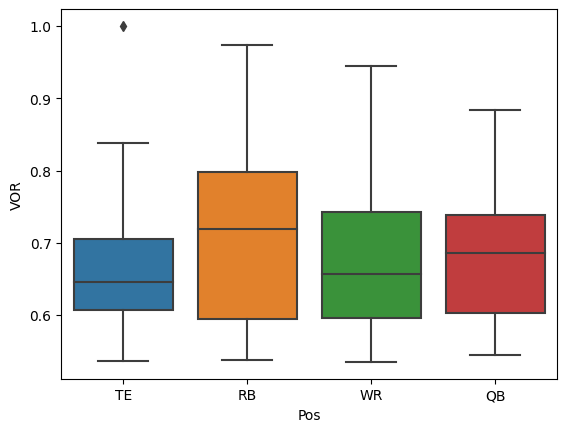

In [19]:
import seaborn as sns

num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

Just from this boxplot, you can have some key takeaways. We can see that there is 1 outlier at TE, which is Travis Kelce. By selecting Travis Kelce you will have a huge step up in your league by having a player with a VOR significantly larger than other players at that position. Along with this, the visualization showcases to se that the rest of the TE position has many players with a similar VOR. This helps us understand that we don't need to necessarily draft a TE early in the draft, given that many of the TEs have VORs in similar ranges. You don't have that much of an advantage of drafting 1 TE earlier than another after the first tight end is selected. So in this case, you should either draft Kelce or hold off a while.

Looking at other positions, like runningbacks, we can see that their variance is larger than the other positions. For those who don't know, variance refers to how far each number in a set is away from the mean. As we can see, the VORs for runningbacks is very spread out, indicating the high variance. With a high variance, we can see that we might end up with varying totals of VOR scores when drafting runningback. The high variance means that the VOR values are less consistent across runningbacks, making it harder to predict. This might lead us to having a very high VOR score or a very low VOR score when drafting a runningback. Hence, the high variance indicates that RBs should be drafted earlier than the other positions to help increase the total VOR of a lineup. We will want to invest in a runningback earlier in the draft hoping that we end up with one or two with a high VOR, rather than wait and potentially end up with a low VOR runningback.

As discussed earlier, if you have played fantasy football before, you know that QBs are typically drafted around one another and have similar projected scores. As seen with the boxplot, QBs have low variation and low VOR, which confirms some findings that you may have had from years of fantasy of football! Similarly, you may have seen runningbacks typically get drafted earlier. This is confirmed by the large variation in VORs for runningbacks, which often leads runningbacks to be drafted earlier in drafts.

This boxplot allowed us to see the VORs for each position and understand which positions are better to invest in early in the draft (like runningbacks) and which ones we can potentially wait on (tight ends or quarterbacks). The boxplot is helpful, but we can find much more from the VOR rankings.

Along with creating the boxplots, we can look further into how we can leverage the VOR rankings to assist with our draft strategy.


In our draft, we want to find players with high VORs compared to their ADP. We want to combine our VOR rankings with our ADP data, which can help us define the risk we are taking by waiting to take a player with the next pick and help us bargain players. By doing this, we might be able to get higher VOR players at later rounds, allowing us to significantly increase our lineup's total VOR. With VOR side by side with the ADP data, we can pick players much cheaper/later than what our value rankings have him at, allowing us to accumulate even more total VOR in our lineup.

In [20]:
#Renaming columns to assist with merging the two dataframes
avgdp_df = avgdp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'Rank': 'ADP Rank'
}, axis=1)

avgdp_df = avgdp_df.drop('Current ADP', axis=1)
avgdp_df.head()

,Player,Pos,Team,ADP Rank
0,Justin Jefferson,WR,MIN,1.0
1,Christian McCaffrey,RB,SF,2.0
2,Ja'Marr Chase,WR,CIN,3.0
3,Austin Ekeler,RB,LAC,4.0
4,Travis Kelce,TE,KC,5.0


Here we are merging the VOR dataframe and the original ADP dataframe together on the player names.

In [21]:
combined_df = df.merge(avgdp_df, how='left', on=['Player', 'Pos'])

combined_df = combined_df.drop(['Team_x', 'Team_y'], axis=1)

combined_df.head(10)

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank
0,Travis Kelce,TE,235.39,1.000000,1.0,5.0
1,Christian McCaffrey,RB,271.96,0.973060,2.0,2.0
2,Austin Ekeler,RB,264.94,0.956587,3.0,4.0
3,Justin Jefferson,WR,260.12,0.944079,4.0,1.0
4,Ja'Marr Chase,WR,256.74,0.936147,5.0,3.0
5,Cooper Kupp,WR,250.49,0.921481,6.0,7.0
6,Tyreek Hill,WR,248.25,0.916224,7.0,6.0
7,Bijan Robinson,RB,236.96,0.890927,8.0,8.5
8,Derrick Henry,RB,236.48,0.889801,9.0,15.5
9,Nick Chubb,RB,236.16,0.889050,10.0,10.0


Just from preliminary viewing of this table, we can see a few players like Kelce and Derrick Henry with a higher VOR Rank than their ADP ranks, which would be players we would be able to get at bargains. On the other hand, we have players like Justin jefferson and Ja'Marr Chase that have VOR ranks lower than their ADP ranks, meaning that these players are not the best values.

With this table, we can now calculate the difference between VOR Rank and ADP rank for each player. If the difference is positive, that means there is a positive gap between the ADP and VOR Rank. This would indicate that the VOR rank is lower than the ADP rank, showcasing that others are undervaluing the player (which is a good thing for us!). We want to draft more players with a positive difference and less with a negative difference.

In [22]:
# Calculating the difference between the ADP Rank and VOR Rank
combined_df['Diff in ADP and VOR Rank'] = combined_df['ADP Rank'] - combined_df['VOR Rank']

#Removing players that are usually not drafted
combined_df = combined_df.loc[combined_df['ADP Rank'] <= 212]

combined_df.head(25)

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
0,Travis Kelce,TE,235.390,1.000000,1.0,5.0,4.0
1,Christian McCaffrey,RB,271.960,0.973060,2.0,2.0,0.0
2,Austin Ekeler,RB,264.940,0.956587,3.0,4.0,1.0
3,Justin Jefferson,WR,260.120,0.944079,4.0,1.0,-3.0
4,Ja'Marr Chase,WR,256.740,0.936147,5.0,3.0,-2.0
5,Cooper Kupp,WR,250.490,0.921481,6.0,7.0,1.0
6,Tyreek Hill,WR,248.250,0.916224,7.0,6.0,-1.0
7,Bijan Robinson,RB,236.960,0.890927,8.0,8.5,0.5
8,Derrick Henry,RB,236.480,0.889801,9.0,15.5,6.5
9,Nick Chubb,RB,236.160,0.889050,10.0,10.0,0.0


Just taking an initial look at the difference between VOR Rank and ADP rank, we can see some players with large differences. We can see that Josh Jacobs has a difference of 11.5, indicating that the general public undervalues him but we know his true VOR, allowing us to get a great player at a discount. Some other positive VOR/ADP difference players include Josh Allen, Joe Mixon and TJ Hockenson. On the other hand, we can see some negative difference VOR/ADP players, like AJ Brown. We see that his score is -11, indicating that the general public drafts him a lot earlier than our VOR rankings, so this would be a player we would avoid using our VOR strategy. In simplest terms, aim for players with positive differences in VOR/Draft and avoid any players with negative differences. Lets try finding players who have a positive VOR vs ADP difference.

##Insights

By knowing the difference between VOR and ADP ranks for each player, we can help identify the most undervalued players, or also known as "sleepers"

In [23]:
draft_sleepers = combined_df.sort_values(by='ADP Rank')[:196]

rb_draft_sleepers = draft_sleepers.loc[draft_sleepers['Pos'] == 'RB']
qb_draft_sleepers = draft_sleepers.loc[draft_sleepers['Pos'] == 'QB']
wr_draft_sleepers = draft_sleepers.loc[draft_sleepers['Pos'] == 'WR']
te_draft_sleepers = draft_sleepers.loc[draft_sleepers['Pos'] == 'TE']

Now that we have grouped by each position, we can view sleepers for each position. We will look at the most undervalued players and we can use these as shortlists of players that we should draft for each position. The undervalued players are the ones with the highest score in difference between VOR and ADP.

### Players to Target based on VOR versus ADP

The 4 lists of players are players with high Diff in ADP and VOR Rank. By having a VOR much lower than their ADP, these are players we will want to target, because we believe their VOR will be much better than their ADP suggests.

In [24]:
# Top 10 most undervalued runningbacks for 2023.
rb_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=False)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
125,Jeff Wilson Jr,RB,127.27,0.633522,126.0,173.5,47.5
48,Rachaad White,RB,180.70,0.758904,49.0,72.0,23.0
33,Alexander Mattison,RB,193.22,0.788285,34.0,56.0,22.0
36,James Conner,RB,190.22,0.781245,37.0,58.0,21.0
22,Aaron Jones,RB,211.28,0.830665,23.0,39.5,16.5
20,Joe Mixon,RB,214.82,0.838972,21.0,37.0,16.0
58,Isiah Pacheco,RB,170.81,0.735696,59.0,73.0,14.0
10,Josh Jacobs,RB,235.65,0.887853,11.0,22.5,11.5
8,Derrick Henry,RB,236.48,0.889801,9.0,15.5,6.5
69,David Montgomery,RB,165.86,0.724080,70.0,75.0,5.0


In [25]:
# Top 10 most undervalued quarterbacks for 2023.
qb_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=False)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
119,Russell Wilson,QB,272.802,0.640173,120.0,143.0,23.0
173,Matthew Stafford,QB,244.008,0.572603,174.0,196.0,22.0
90,Geno Smith,QB,292.112,0.685487,91.0,110.0,19.0
84,Daniel Jones,QB,295.098,0.692494,85.0,103.0,18.0
86,Kirk Cousins,QB,292.518,0.686440,88.5,101.0,12.5
13,Josh Allen,QB,376.704,0.883995,14.0,21.0,7.0
16,Jalen Hurts,QB,373.614,0.876744,17.0,22.5,5.5
75,Deshaun Watson,QB,304.004,0.713393,76.0,81.5,5.5
27,Lamar Jackson,QB,345.596,0.810995,28.0,32.0,4.0
31,Joe Burrow,QB,337.726,0.792527,32.0,34.5,2.5


In [26]:
# Top 10 most undervalued wide receivers for 2023.
wr_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=False)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
164,Van Jefferson,WR,105.51,0.581262,165.0,211.0,46.0
139,DJ Chark Jr,WR,119.45,0.613975,140.0,185.0,45.0
136,Zay Jones,WR,120.45,0.616321,137.0,176.5,39.5
142,Michael Gallup,WR,118.40,0.611511,143.0,182.0,39.0
122,Jakobi Meyers,WR,129.96,0.638638,123.0,158.5,35.5
129,Nico Collins,WR,125.10,0.627233,130.0,165.0,35.0
130,Tyler Boyd,WR,124.77,0.626459,131.0,157.0,26.0
143,Darnell Mooney,WR,118.27,0.611206,144.0,168.0,24.0
187,John Metchie,WR,95.41,0.557561,188.0,212.0,24.0
162,KJ Osborn,WR,107.33,0.585533,163.0,183.5,20.5


In [27]:
# Top 10 most undervalued tight ends for 2023.
te_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=False)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
91,Gerald Everett,TE,100.60,0.683694,92.0,189.5,97.5
99,Juwan Johnson,TE,93.07,0.666024,100.0,194.0,94.0
108,Irv Smith Jr,TE,87.58,0.653141,109.0,197.0,88.0
124,Dawson Knox,TE,79.22,0.633522,125.0,207.5,82.5
80,Tyler Higbee,TE,109.51,0.704603,81.0,156.0,75.0
135,Mike Gesicki,TE,73.79,0.620780,136.0,205.0,69.0
133,Michael Mayer,TE,74.06,0.621414,134.0,200.0,66.0
111,Sam LaPorta,TE,86.00,0.649433,112.0,163.0,51.0
153,Luke Musgrave,TE,66.24,0.603063,154.0,204.0,50.0
78,Dalton Schultz,TE,110.72,0.707442,79.0,123.0,44.0


As shown in the 4 tables above, those are all players you will be able to draft at their average draft position, while still knowing that you are getting a player with a great VOR. Being able to select high VOR players later than expected is a great way to increase your overall VOR for your lineup. Now that we have shortlists for the players you should target, lets look into the players you should NOT target.

### Players to Avoid based on VOR and ADP

Here we will now create shortlists of players that are overvalued for each position. The following 4 lists are players that we might want to avoid in 2023 because their ADPs are much earlier than their VORs.

In [28]:
# Top 10 most overvalued runningbacks for 2023.
rb_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=True)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
354,Deuce Vaughn,RB,47.51,0.446353,355.0,181.0,-174.0
352,Zamir White,RB,48.56,0.448817,353.0,188.0,-165.0
303,Kendre Miller,RB,59.70,0.474959,303.5,160.0,-143.5
299,Jerome Ford,RB,60.79,0.477517,300.0,201.0,-99.0
258,Clyde Edwards-Helaire,RB,68.62,0.495891,259.0,173.5,-85.5
229,Roschon Johnson,RB,75.81,0.512763,230.0,158.5,-71.5
184,De'Von Achane,RB,96.85,0.562137,185.0,114.0,-71.0
247,Tyjae Spears,RB,71.16,0.501852,248.0,180.0,-68.0
172,Damien Harris,RB,101.87,0.573917,173.0,105.0,-68.0
267,Chase Brown,RB,67.33,0.492864,268.0,202.5,-65.5


In [29]:
# Top 10 most overvalued quarterbacks for 2023.
qb_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=True)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
320,Sam Howell,QB,198.356,0.465474,321.0,206.0,-115.0
270,CJ Stroud,QB,209.274,0.491094,271.0,178.0,-93.0
272,Mac Jones,QB,208.702,0.489752,273.0,198.0,-75.0
268,Kyler Murray,QB,209.386,0.491357,269.0,195.0,-74.0
191,Bryce Young,QB,232.460,0.545504,192.0,146.5,-45.5
127,Tua Tagovailoa,QB,269.650,0.632776,128.0,86.0,-42.0
223,Jimmy Garoppolo,QB,220.904,0.518386,224.0,191.0,-33.0
141,Anthony Richardson,QB,260.636,0.611623,142.0,109.0,-33.0
192,Brock Purdy,QB,232.372,0.545298,193.0,162.0,-31.0
81,Trevor Lawrence,QB,298.670,0.700876,82.0,54.0,-28.0


In [30]:
# Top 10 most overvalued wide receivers for 2023.
wr_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=True)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
324,Tank Dell,WR,55.25,0.463319,325.0,202.5,-122.5
277,Jalin Hyatt,WR,65.73,0.487912,278.0,164.0,-114.0
163,Elijah Moore,WR,105.64,0.581567,164.0,111.0,-53.0
176,Jameson Williams,WR,99.75,0.567746,177.0,128.0,-49.0
177,Rashod Bateman,WR,99.40,0.566924,178.0,136.0,-42.0
215,Rashee Rice,WR,84.18,0.531208,216.0,186.0,-30.0
132,Odell Beckham Jr,WR,122.72,0.621648,133.0,108.0,-25.0
126,Kadarius Toney,WR,127.56,0.633006,127.0,106.0,-21.0
106,Jaxon Smith-Njigba,WR,136.47,0.653915,107.0,88.0,-19.0
44,DeVonta Smith,WR,184.80,0.767329,45.0,27.0,-18.0


In [31]:
# Top 10 most overvalued tight ends for 2023.
te_draft_sleepers.sort_values(by='Diff in ADP and VOR Rank', ascending=True)[:10]

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
0,Travis Kelce,TE,235.39,1.000000,1.0,5.0,4.0
21,Mark Andrews,TE,166.18,0.837588,22.0,29.0,7.0
51,Dallas Goedert,TE,130.30,0.753390,52.0,60.0,8.0
79,David Njoku,TE,110.51,0.706949,80.0,92.0,12.0
49,Kyle Pitts,TE,132.30,0.758083,50.0,63.0,13.0
66,Evan Engram,TE,118.82,0.726450,67.0,80.0,13.0
34,George Kittle,TE,143.94,0.785398,35.0,49.0,14.0
68,Pat Freiermuth,TE,118.24,0.725089,69.0,85.0,16.0
25,TJ Hockenson,TE,158.07,0.818556,26.0,43.0,17.0
101,Cole Kmet,TE,91.54,0.662433,102.0,123.0,21.0


The 4 tables above can provide a good short life of players that you should not draft at their respective ADPs. Drafting them at their ADPs would lead to a net loss of VOR, resulting in a potentially worse draft.

If you noticed, the tight end position doesn't seem to have any overvalued players. The highest difference in ADP and VOR rank is positive, indicating that tight ends VOR is consistently better than their ADP for all tight ends. This tells us that this is they year to draft tight ends earlier than their ADP, irregardless of which tight end being selected.

## Conclusion
With this study, we were able to solve the overarching question in the study which was **can we develop a draft ranking that is based on VOR, which would allow us to pick players with the highest values compared to their positional replacements?** By leveraging fantasy football projection and average draft position datasets, we were able to develop a VOR draft ranking that can assist users in drafting teams with the highest total VOR. On top of the rankings itself, we were able to complete further analysis on the VOR with players' ADPs. By using the VOR and ADP together we were able to find valuable players (sleepers) and players we want to avoid for each relevant position. Hopefully the VOR rankings and the specified players to target and avoid can help you draft a strong team in 2023. Good luck!

For anyone who wishes to use the base VOR rankings for 1/2 PPR scoring, here it is. Remember, the undervalued and overvalued charts discussed earlier can be very helpful in the later points of the draft as well!

In [32]:
combined_df.head(200)

,Player,Pos,ProjectedFantasyPoints,VOR,VOR Rank,ADP Rank,Diff in ADP and VOR Rank
0,Travis Kelce,TE,235.390,1.000000,1.0,5.0,4.0
1,Christian McCaffrey,RB,271.960,0.973060,2.0,2.0,0.0
2,Austin Ekeler,RB,264.940,0.956587,3.0,4.0,1.0
3,Justin Jefferson,WR,260.120,0.944079,4.0,1.0,-3.0
4,Ja'Marr Chase,WR,256.740,0.936147,5.0,3.0,-2.0
5,Cooper Kupp,WR,250.490,0.921481,6.0,7.0,1.0
6,Tyreek Hill,WR,248.250,0.916224,7.0,6.0,-1.0
7,Bijan Robinson,RB,236.960,0.890927,8.0,8.5,0.5
8,Derrick Henry,RB,236.480,0.889801,9.0,15.5,6.5
9,Nick Chubb,RB,236.160,0.889050,10.0,10.0,0.0


In [34]:
from google.colab import files

# Saving the rankings as a csv file
combined_df.to_csv('ValueOverReplacementRankings.csv', encoding = 'utf-8-sig')
files.download('ValueOverReplacementRankings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>